In [1]:
from pathlib import Path
import hydra
from omegaconf import DictConfig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from unet_compare.functions import ( get_brains, data_aug, mask_gen, kspace_to_image )

Using TensorFlow backend.
/Users/duncanboyd/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term


cfg is manually set, as jupyter and hydra do not like each other

Uses:
  BATCH_SIZE: 10
  NUM_TRAIN: 100
  NUM_MASKS: 1
  ACCEL: 5

In [3]:
cfg = {'params': {'EPOCHS': 1, 'MOD': 1.42, 'RE_MOD': 1.0, 'BATCH_SIZE': 10, 'NUM_TRAIN': 100, 'NUM_VAL': 1, 'NUM_TEST': 1, 'NUM_MASKS': 1, 'UNIT_CONFIRM': 1, 'LR': 0.001, 'ACCEL': 5, 'BETA_1': 0.9, 'BETA_2': 0.999}, 'addrs': {'TEST': 'test/*.npy', 'TRAIN': 'train/*.npy', 'VAL': 'val/*.npy', 'STATS': 'outputs_1/stats.npy', 'COMP_MODEL': 'outputs_1/comp_model', 'REAL_MODEL': 'outputs_1/real_model', 'COMP_LOG': 'outputs_1/comp_unet.log', 'REAL_LOG': 'outputs_1/unet.log', 'FUNC': 'functions', 'COMP_CHEC': 'outputs_1/comp_check', 'REAL_CHEC': 'outputs_1/real_check', 'COMP_CSV': 'outputs_1/comp_unet_train.log', 'REAL_CSV': 'outputs_1/real_unet_train.log', 'MASKS': 'inputs/masks/*.npy', 'MASK_SAVE': 'inputs/masks', 'COMP_ARC': 'arc_outputs/arc_14886436/comp_model', 'REAL_ARC': 'arc_outputs/arc_14886436/real_model'}}

ADDR = Path.cwd()

In [4]:
mask_gen(ADDR, cfg)

In [5]:
(
    mask,
    stats,
    kspace_train,
    image_train,
    kspace_val,
    image_val,
    kspace_test,
    image_test,
) = get_brains(cfg, ADDR)

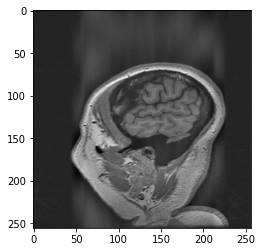

In [13]:
aux = np.fft.ifft2(kspace_train[:, :, :, 0] + 1j * kspace_train[:, :, :, 1])
image = np.copy(kspace_train)
image[:, :, :, 0] = aux.real
image[:, :, :, 1] = aux.imag

plt.imshow(image[3, :, :, 0], cmap = 'gray')
plt.show()

<class 'numpy.ndarray'>
[2.19021530e-01 2.75370513e-08]
(4.716342926025391+1.1831520485561232e-10j)
(100, 256, 256)
(100, 256, 256)
4.716342926025391
1.1831520485561232e-10
4.716342926025391 1.1831520485561232e-10
(100, 256, 256, 2)
(100, 256, 256, 2)


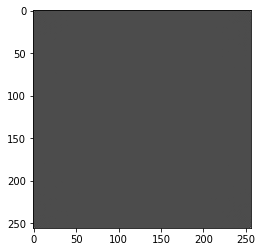

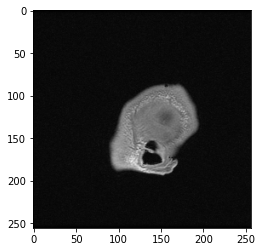

[[[[ 1.89697349e+00  1.37259093e-11]
   [-8.03989947e-01 -2.25678787e-01]
   [ 3.38300258e-01  1.91304430e-01]
   ...
   [-1.22461915e-02 -2.95683462e-02]
   [ 3.38300258e-01 -1.91304415e-01]
   [-8.03989887e-01  2.25678772e-01]]

  [[-7.81838775e-01 -2.61879861e-01]
   [ 6.38201058e-01  4.27297324e-01]
   [-3.01201016e-01 -3.14554214e-01]
   ...
   [-8.07772279e-02  7.84947127e-02]
   [-1.38917655e-01  1.45960655e-02]
   [ 5.26825547e-01  3.03571858e-02]]

  [[ 2.44906783e-01  1.94196731e-01]
   [-2.54616559e-01 -3.11149061e-01]
   [ 1.36201829e-01  2.26610079e-01]
   ...
   [ 1.37286022e-01 -6.24363720e-02]
   [-1.16345637e-01  1.05582597e-02]
   [-7.75126517e-02 -3.29589397e-02]]

  ...

  [[ 1.42194079e-02 -6.69028535e-02]
   [-1.21552795e-01  1.27895743e-01]
   [ 1.68664217e-01 -7.68448263e-02]
   ...
   [ 7.24813268e-02  2.43412331e-02]
   [-2.87734680e-02  3.16021219e-02]
   [ 1.89866964e-02 -2.38147732e-02]]

  [[ 2.44906798e-01 -1.94196731e-01]
   [-7.75126517e-02  3.29589434e

In [6]:
test_training = kspace_to_image(image_train)
print(test_training.shape)
print(image_train.shape)

plt.imshow(test_training[0, :, :, 0], cmap = 'gray')
plt.show()

plt.imshow(image_train[0, :, :, 0], cmap = 'gray')
plt.show()

print(test_training)

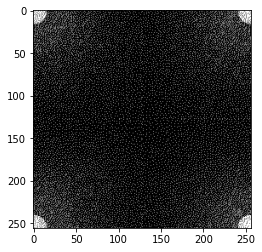

In [7]:
plt.imshow(~mask[0], cmap = 'gray')
plt.show()

In [8]:
combined = data_aug(image_train, mask, stats, cfg)

Image generator does not provide a kspace version of the reconstructed image. This is because 
the training process does not use it at the moment. 

Left to right: Complete image, incomplete image, incomplete kspace.

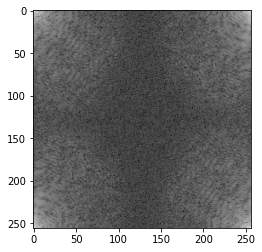

In [9]:
plt.imshow(np.log(1+np.abs(np.fft.fft2(image_train[0, :, :, 0] + 1j * image_train[0, :, :, 1]))),cmap = 'gray')
plt.show()

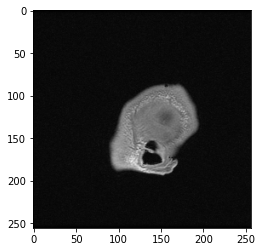

In [10]:

plt.imshow(image_train[0, :, :, 0],cmap = 'gray')
plt.show()


(10, 256, 256, 2)
(10, 256, 256, 1)


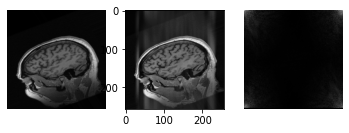

In [11]:
# sample data augmentation
for ii in combined:
    print(ii[0].shape)
    print(ii[1].shape)
    plt.figure()
    plt.subplot(2, 3, 1)
    plt.imshow(ii[1][0,:,:,0],cmap = 'gray')
    plt.axis("off")
    plt.subplot(2, 3, 2)
    plt.imshow(
        (
            255.0
            - np.abs(
                np.fft.ifft2(ii[0][0, :, :, 0] + 1j * ii[0][0, :, :, 1])
            )
        ),
        cmap="Greys",
    )
    plt.subplot(2, 3, 3)
    plt.imshow(np.log(1+np.abs(ii[0][0,:,:,0] + 1j*ii[0][0,:,:,1])),cmap = 'gray')
    plt.axis("off")
    plt.show()
    break